# Load Dataset from HuggingFace

In [1]:
from datasets import load_dataset, load_from_disk

In [2]:
dataset = load_dataset("dair-ai/emotion", "unsplit")
dataset.save_to_disk("emotion_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/416809 [00:00<?, ? examples/s]

In [1]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk
import re

In [4]:
dataset = load_from_disk("emotion_dataset")

for split, data in dataset.items():
    data.to_csv(f"dataset-{split}.csv", index = None)

Creating CSV from Arrow format:   0%|          | 0/417 [00:00<?, ?ba/s]

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset-train.csv",  encoding="latin-1", dtype={"label": np.int32})

df.head(100)

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
95,i really liked it and i have a feeling the bel...,1
96,i feel like talking in a snobbish uppity accen...,3
97,i don t feel as needy and desperate to prove t...,0
98,i feel bad for my mum who carries everything a...,0


In [11]:
df.dtypes

text     object
label     int32
dtype: object

<Axes: xlabel='label'>

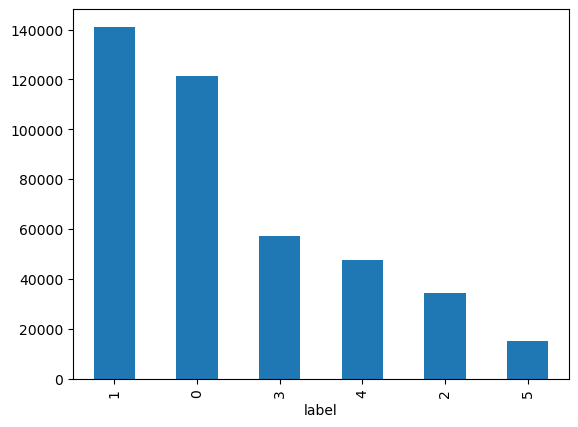

In [10]:
df["label"].value_counts().plot.bar(x="label", y="count")

# Clean Dataset

In [4]:
stop_words = stopwords.words("english")
additional_stop_words = ["im", "cant", "didnt", "doesnt", "werent", "hasnt", "havent", "ive"] # mispelled words and most common words 
lemmatizer = WordNetLemmatizer()

def preprocess(texts):
    output = []
    for text in texts:
        tokenized_text = word_tokenize(text)
        # print(tokenized_text)
        tokenized_text = [t.strip() for t in tokenized_text if t not in stop_words and t not in additional_stop_words]
        
        output += [" ".join(lemmatizer.lemmatize(str(x)) for x in tokenized_text)]
    
    return output

# Split Dataset

In [5]:
from sklearn.model_selection import cross_validate, train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X.astype(str).to_numpy(), y.to_numpy(), test_size=0.2, random_state=42, shuffle=True)

print(f"train size: {len(X_train)}\ttest size: {len(X_test)}")

train size: 333447	test size: 83362


In [15]:
clean_df = df
clean_df["text"] = preprocess(clean_df["text"])

clean_df.head(100)

,text,label
0,feel awful job get position succeed happen,0
1,alone feel awful,0
2,probably mentioned really feel proud actually ...,1
3,feeling little low day back,0
4,beleive much sensitive people feeling tend com...,2
...,...,...
95,really liked feeling beloved would liked excep...,1
96,feel like talking snobbish uppity accent respo...,3
97,feel needy desperate prove thing,0
98,feel bad mum carry everything everyone,0


# WordCloud Plotting

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

7889189


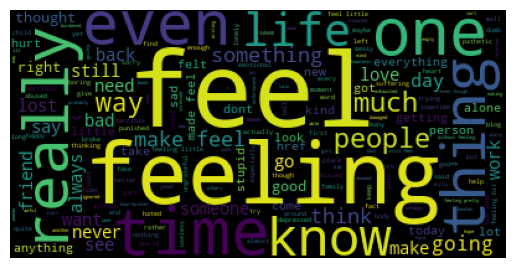

In [81]:
sad_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 0).astype(str))
print(len(sad_text))
sad_wc = WordCloud().generate_from_text(sad_text)

plt.imshow(sad_wc)
plt.axis("off")
plt.show()

9455904


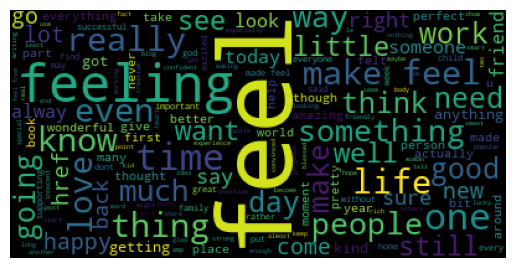

In [83]:
joy_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 1).astype(str))
print(len(joy_text))
joy_wc = WordCloud().generate_from_text(joy_text)

plt.imshow(joy_wc)
plt.axis("off")
plt.show()

3364728


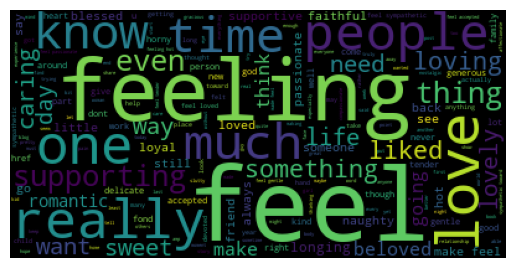

In [84]:
love_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 2).astype(str))
print(len(love_text))
love_wc = WordCloud().generate_from_text(love_text)

plt.imshow(love_wc)
plt.axis("off")
plt.show()

4471296


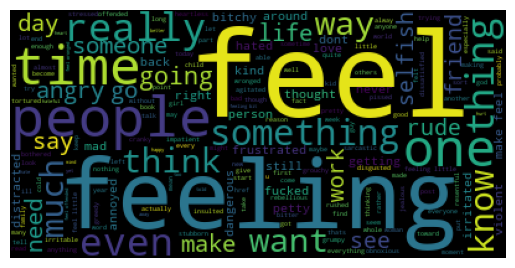

In [85]:
anger_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 3).astype(str))
print(len(anger_text))
anger_wc = WordCloud().generate_from_text(anger_text)

plt.imshow(anger_wc)
plt.axis("off")
plt.show()

3980363


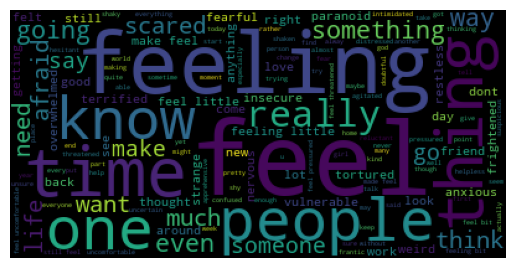

In [86]:
fear_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 4).astype(str))
print(len(fear_text))
fear_wc = WordCloud().generate_from_text(fear_text)

plt.imshow(fear_wc)
plt.axis("off")
plt.show()

2128532


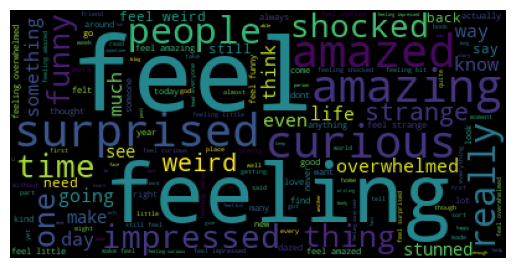

In [87]:
surprise_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 5).astype(str))
print(len(surprise_text))
surprise_wc = WordCloud().generate_from_text(surprise_text)

plt.imshow(surprise_wc)
plt.axis("off")
plt.show()

## Remove common words from wordcloud analysis

In [99]:
additional_stop_words = ["im", "cant", "didnt", "doesnt", "werent", "hasnt", "havent", "ive", "feel", "feeling"]

clean2_df = df
clean2_df["text"] = preprocess(clean2_df["text"])

clean2_df.head(100)

,text,label
0,awful job get position succeed happen,0
1,alone awful,0
2,probably mentioned really proud actually keepi...,1
3,little low day back,0
4,beleive much sensitive people tend compassionate,2
...,...,...
95,really liked beloved would liked except away s...,1
96,like talking snobbish uppity accent responding...,3
97,needy desperate prove thing,0
98,bad mum carry everything everyone,0


7109328


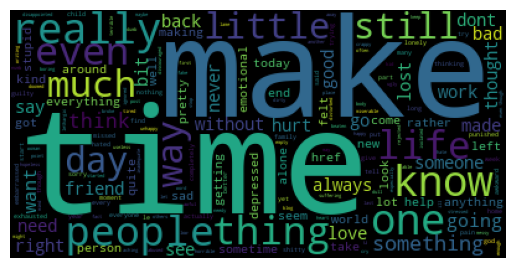

In [100]:
sad_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 0).astype(str))
print(len(sad_text))
sad_wc = WordCloud().generate_from_text(sad_text)

plt.imshow(sad_wc)
plt.axis("off")
plt.show()

8579161


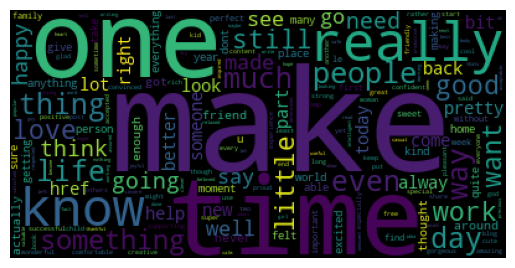

In [101]:
joy_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 1).astype(str))
print(len(joy_text))
joy_wc = WordCloud().generate_from_text(joy_text)

plt.imshow(joy_wc)
plt.axis("off")
plt.show()

3145763


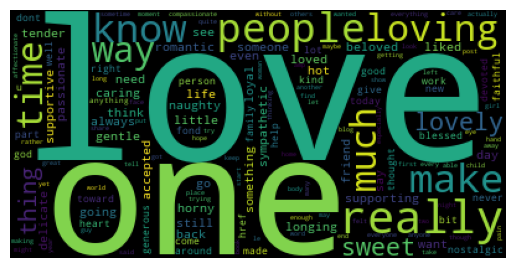

In [102]:
love_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 2).astype(str))
print(len(love_text))
love_wc = WordCloud().generate_from_text(love_text)

plt.imshow(love_wc)
plt.axis("off")
plt.show()

4113752


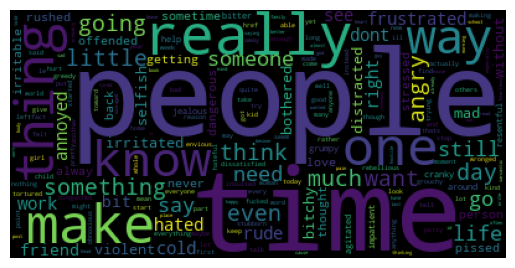

In [103]:
anger_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 3).astype(str))
print(len(anger_text))
anger_wc = WordCloud().generate_from_text(anger_text)

plt.imshow(anger_wc)
plt.axis("off")
plt.show()

3673413


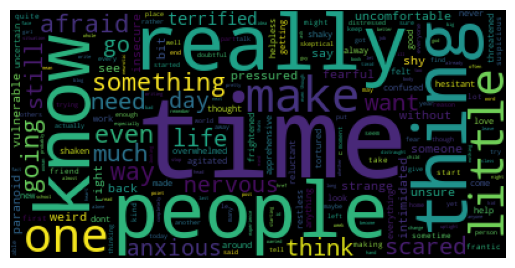

In [95]:
fear_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 4).astype(str))
print(len(fear_text))
fear_wc = WordCloud().generate_from_text(fear_text)

plt.imshow(fear_wc)
plt.axis("off")
plt.show()

2032139


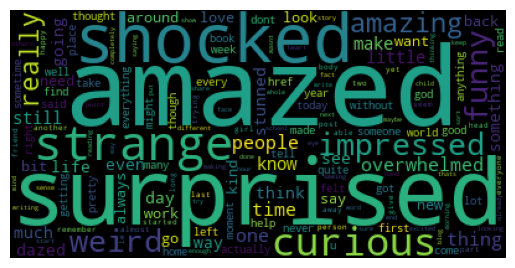

In [96]:
surprise_text = "".join(x for x in clean_df["text"].where(clean_df["label"] == 5).astype(str))
print(len(surprise_text))
surprise_wc = WordCloud().generate_from_text(surprise_text)

plt.imshow(surprise_wc)
plt.axis("off")
plt.show()

# Utils

In [12]:
import dill

def save_model(model, path):
    dill.settings['recurse'] = True
    with open(path,'wb') as io:
        dill.dump(model ,io)

def load_model(path):
    model = None
    with open(path,'rb') as io:
        model=dill.load(io)
    
    return model

# Models

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate, LearningCurveDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay, classification_report

## MNB

### Create Model

In [129]:
mnb_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", MultinomialNB())])

mnb_pipeline

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f1ad7aa3c40>)),
                ('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])

In [134]:
%%time

cv_result = cross_validate(
    mnb_pipeline, X_train, y_train, cv=5, 
    scoring=["accuracy", "f1_macro", "recall_macro", "precision_macro"], 
    n_jobs=10, return_train_score=True)

cv_result

CPU times: user 498 ms, sys: 164 ms, total: 662 ms
Wall time: 51.7 s


{'fit_time': array([22.15617633, 22.54013181, 22.51258063, 21.89654565, 22.23995996]),
 'score_time': array([5.63210154, 5.73556232, 5.85414386, 5.59564304, 5.62141991]),
 'test_accuracy': array([0.86701155, 0.86783626, 0.86801422, 0.86640975, 0.86957369]),
 'train_accuracy': array([0.89854062, 0.89819948, 0.89841729, 0.89825235, 0.89852975]),
 'test_f1_macro': array([0.79359907, 0.79427313, 0.79542576, 0.79209062, 0.79501161]),
 'train_f1_macro': array([0.84435083, 0.84364084, 0.84375802, 0.84362078, 0.84438088]),
 'test_recall_macro': array([0.75818511, 0.75980975, 0.7608844 , 0.75721373, 0.76126945]),
 'train_recall_macro': array([0.81184094, 0.81074955, 0.81076649, 0.81094173, 0.81170687]),
 'test_precision_macro': array([0.86793521, 0.86745117, 0.86721397, 0.86441876, 0.86735862]),
 'train_precision_macro': array([0.90243292, 0.90263685, 0.90364298, 0.90264492, 0.90304155])}

In [138]:
print(f"test accuracy: {cv_result['test_accuracy'].mean()}\t\ttrain accuracy: {cv_result['train_accuracy'].mean()}\t\tdifference{cv_result['test_accuracy'].mean() - cv_result['train_accuracy'].mean()}")
print(f"test f1 macro: {cv_result['test_f1_macro'].mean()}\t\ttrain f1 macro: {cv_result['train_f1_macro'].mean()}\t\tdifference{cv_result['test_f1_macro'].mean() - cv_result['train_f1_macro'].mean()}")
print(f"test recall macro: {cv_result['test_recall_macro'].mean()}\t\ttrain recall macro: {cv_result['train_recall_macro'].mean()}\t\tdifference{cv_result['test_recall_macro'].mean() - cv_result['train_recall_macro'].mean()}")
print(f"test precision macro: {cv_result['test_precision_macro'].mean()}\ttrain precision macro: {cv_result['train_precision_macro'].mean()}\tdifference{cv_result['test_precision_macro'].mean() - cv_result['train_precision_macro'].mean()}")

test accuracy: 0.8677690928104986		train accuracy: 0.898387899699431		difference-0.03061880688893237
test f1 macro: 0.7940800378939166		train f1 macro: 0.843950270153042		difference-0.04987023225912546
test recall macro: 0.759472486150986		train recall macro: 0.8112011144581945		difference-0.05172862830720859
test precision macro: 0.8668755454103971	train precision macro: 0.9028798446501177	difference-0.036004299239720594


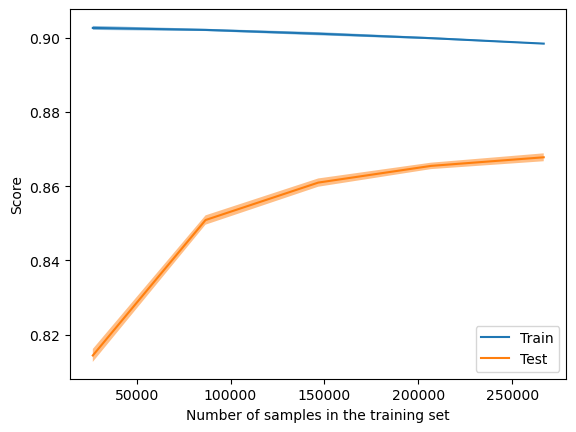

CPU times: user 3.33 s, sys: 1.94 s, total: 5.27 s
Wall time: 2min 7s


In [133]:
%%time

LearningCurveDisplay.from_estimator(mnb_pipeline, X_train, y_train, n_jobs=10)

plt.show()

In [143]:
mnb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f1ad7aa3c40>)),
                ('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])

### Save Model

In [139]:
import dill
dill.settings['recurse'] = True

In [144]:
with open('./mnb_v1.0.joblib','wb') as io:
    dill.dump(mnb_pipeline ,io)

In [145]:
model = None
with open('./mnb_v1.0.joblib','rb') as io:
    model=dill.load(io)

model

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f1bc0ee3240>)),
                ('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])

In [146]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Precision score: {precision_score(y_test, y_pred, average='macro')}")

y_pred

Accuracy: 0.8720640099805667
F1 score: 0.8016507279095028
Recall score: 0.7683728349981244
Precision score: 0.870450499285549


array([0, 0, 4, ..., 0, 0, 4])

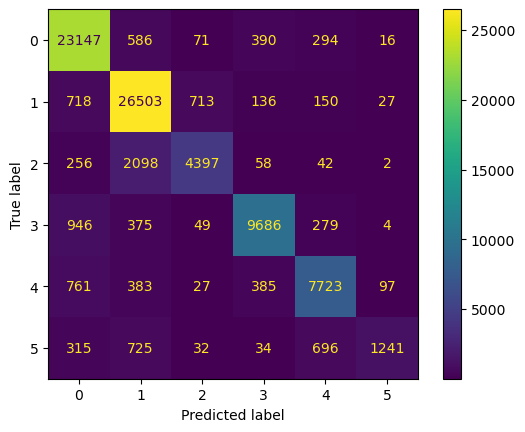

In [149]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

## Decision Tree

### Create Model

In [17]:
dt_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", DecisionTreeClassifier(max_depth=3))])

dt_pipeline

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f89cd770d60>)),
                ('vectorizer', CountVectorizer()),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [ ]:
dt_pipeline.fit(X_train, y_train)

In [22]:
y_pred = dt_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred, average='micro')}")

classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5])

Accuracy: 0.34873203617955423
Macro F1 score: 0.14955774263348684
Macro Recall score: 0.20416957784114678
Macro Precision score: 0.3743286487869693
Micro F1 score: 0.34873203617955423
Micro Recall score: 0.34873203617955423
Micro Precision score: 0.34873203617955423
CPU times: user 33.9 s, sys: 27.8 ms, total: 33.9 s
Wall time: 33.9 s


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:14

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00     24504\n           1       0.34      1.00      0.51     28247\n           2       0.96      0.04      0.08      6853\n           3       0.00      0.00      0.00     11339\n           4       0.00      0.00      0.00      9376\n           5       0.94      0.18      0.31      3043\n\n    accuracy                           0.35     83362\n   macro avg       0.37      0.20      0.15     83362\nweighted avg       0.23      0.35      0.19     83362\n'

In [21]:
save_model(dt_pipeline, "./decision_tree.joblib")

### Fine Tune Model

In [35]:
%%time

params = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": [3, 4, 5, 8, 10, 15, 20, 25, 30, 50, 75, 100, 200, 500, 750, 1000]
}

grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=params, cv=5, return_train_score=True, n_jobs=10, verbose=10)
fine_tuned_dt_pipeline = grid_search.fit(X_train, y_train)

fine_tuned_dt_pipeline.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 2min 50s, sys: 13.1 s, total: 3min 3s
Wall time: 40min 54s


Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f89cd770d60>)),
                ('vectorizer', CountVectorizer()),
                ('clf', DecisionTreeClassifier(max_depth=500))])

In [48]:
grid_search.cv_results_

{'mean_fit_time': array([ 31.53451157,  31.78469505,  28.09366531,  33.33828588,
         28.75388775,  29.35841107,  33.86973414,  30.97203913,
         31.65410933,  40.1521553 ,  48.61707172,  53.01328883,
        107.72788272, 145.45618639, 132.33697505, 139.33093247,
         25.71308279,  28.92370167,  32.40611253,  28.80345941,
         29.00555415,  33.49767995,  30.35044374,  31.32227478,
         36.08130231,  36.56311083,  43.70863791,  65.76310816,
         89.30174842, 137.25579638, 132.26993389, 118.41260886,
         36.25983386,  25.20256619,  32.59191484,  28.80735631,
         29.18168364,  33.45617228,  30.31842375,  31.34375148,
         36.56578674,  36.46768136,  43.89612298,  66.42157421,
         80.90875602, 132.66436448, 143.53206577, 107.10023212]),
 'std_fit_time': array([ 8.84567991,  8.77555627,  7.16316926,  8.36630196,  7.37484692,
         7.49415871,  9.08847253,  7.77579599,  7.61995202, 10.33742791,
        11.98702825, 10.72204238, 21.39975617, 21.7

In [ ]:
fine_tuned_dt = fine_tuned_dt_pipeline.best_estimator_
fine_tuned_dt.fit(X_train, y_train)

### Get Model Performance

In [37]:
y_pred = fine_tuned_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred, average='micro')}")

classification_report(y_test, y_pred)

Accuracy: 0.8504114584582904
Macro F1 score: 0.7925670211340936
Macro Recall score: 0.7940831313671087
Macro Precision score: 0.7911774712147029
Micro F1 score: 0.8504114584582904
Micro Recall score: 0.8504114584582904
Micro Precision score: 0.8504114584582904


'              precision    recall  f1-score   support\n\n           0       0.91      0.91      0.91     24504\n           1       0.89      0.88      0.88     28247\n           2       0.67      0.68      0.68      6853\n           3       0.85      0.87      0.86     11339\n           4       0.77      0.79      0.78      9376\n           5       0.65      0.64      0.64      3043\n\n    accuracy                           0.85     83362\n   macro avg       0.79      0.79      0.79     83362\nweighted avg       0.85      0.85      0.85     83362\n'

### Save Model

In [38]:
save_model(fine_tuned_dt, "./fine_tuned_decision_tree.joblib")

## Random Forest

In [8]:
rf_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", RandomForestClassifier(max_depth=3, n_jobs=5))])

rf_pipeline

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7fac4399b4c0>)),
                ('vectorizer', CountVectorizer()),
                ('clf', RandomForestClassifier(max_depth=3, n_jobs=5))])

In [ ]:
rf_pipeline.fit(X_train, y_train)

In [43]:
y_pred = rf_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred, average='micro')}")

classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5])

Accuracy: 0.33913533744391927
Macro F1 score: 0.08471024415376592
Macro Recall score: 0.16682990532158015
Macro Precision score: 0.19935069090875843
Micro F1 score: 0.33913533744391927
Micro Recall score: 0.33913533744391927
Micro Precision score: 0.33913533744391927


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:14

'              precision    recall  f1-score   support\n\n           0       0.86      0.00      0.00     24504\n           1       0.34      1.00      0.51     28247\n           2       0.00      0.00      0.00      6853\n           3       0.00      0.00      0.00     11339\n           4       0.00      0.00      0.00      9376\n           5       0.00      0.00      0.00      3043\n\n    accuracy                           0.34     83362\n   macro avg       0.20      0.17      0.08     83362\nweighted avg       0.37      0.34      0.17     83362\n'

In [45]:
save_model(rf_pipeline, "./rf_clf.joblib")

### Fine Tune Model

In [15]:
params = {
    "clf__criterion": ["gini"],
    "clf__max_depth": [250],
    "clf__n_estimators": [100, 150, 200, 250, 300],
}Y

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=params, cv=5, return_train_score=True, n_jobs=10, verbose=10)
fine_tuned_rf_pipeline = grid_search.fit(X_train, y_train)

grid_search.cv_results_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 5/5; 1/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100
[CV 5/5; 1/5] END clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100;, score=(train=0.954, test=0.874) total time=39.0min
[CV 2/5; 3/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=200
[CV 2/5; 3/5] END clf__criterion=gini, clf__max_depth=250, clf__n_estimators=200;, score=(train=0.956, test=0.872) total time=73.8min


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5; 1/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100
[CV 2/5; 1/5] END clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100;, score=(train=0.956, test=0.871) total time=38.9min
[CV 1/5; 3/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=200
[CV 1/5; 3/5] END clf__criterion=gini, clf__max_depth=250, clf__n_estimators=200;, score=(train=0.956, test=0.876) total time=74.3min
[CV 1/5; 1/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100
[CV 1/5; 1/5] END clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100;, score=(train=0.957, test=0.874) total time=40.0min
[CV 5/5; 3/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=200
[CV 5/5; 3/5] END clf__criterion=gini, clf__max_depth=250, clf__n_estimators=200;, score=(train=0.955, test=0.875) total time=73.7min
[CV 4/5; 1/5] START clf__criterion=gini, clf__max_depth=250, clf__n_estimators=100
[CV 4/5; 1/5] END clf__criterion=gini, clf__max_d

{'mean_fit_time': array([2343.10508566, 3207.44239926, 4420.02211208, 5533.01315684,
        4061.65099759]),
 'std_fit_time': array([28.22039293, 12.40875087, 20.13278659, 31.70737203, 21.42494198]),
 'mean_score_time': array([22.75975223, 25.57232881, 27.80980983, 28.77618656, 10.30067472]),
 'std_score_time': array([0.74724163, 0.40839732, 2.40792021, 2.66305003, 2.34658468]),
 'param_clf__criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__max_depth': masked_array(data=[250, 250, 250, 250, 250],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__n_estimators': masked_array(data=[100, 150, 200, 250, 300],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__criterion': 'gini',
   'clf__max_depth': 250,


In [17]:
fine_tuned_rf = fine_tuned_rf_pipeline.best_estimator_
fine_tuned_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7fac4399b4c0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=250, n_estimators=300,
                                        n_jobs=5))])

In [19]:
y_pred = fine_tuned_rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred, average='micro')}")

classification_report(y_test, y_pred)

Accuracy: 0.8716681461577217
Macro F1 score: 0.8122975196099241
Macro Recall score: 0.7980534014329552
Macro Precision score: 0.8295599509325887
Micro F1 score: 0.8716681461577217
Micro Recall score: 0.8716681461577217
Micro Precision score: 0.8716681461577217


'              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.93     24504\n           1       0.88      0.93      0.90     28247\n           2       0.78      0.67      0.72      6853\n           3       0.88      0.85      0.86     11339\n           4       0.80      0.80      0.80      9376\n           5       0.71      0.61      0.66      3043\n\n    accuracy                           0.87     83362\n   macro avg       0.83      0.80      0.81     83362\nweighted avg       0.87      0.87      0.87     83362\n'

### Save Model

In [18]:
save_model(fine_tuned_rf, "./fine_tuned_rf_clf.joblib")

## SVM